In [1]:
# Recurrent Neural Network

#https://www.youtube.com/watch?v=zwqwlR48ztQ

# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('./marketdata/zsh20.csv')
#dataset_train = dataset_train[dataset_train["Volume"] != 0]

dataset_train.Time = pd.to_datetime(dataset_train.Time.str.replace('D', 'T'))
dataset_train = dataset_train.sort_values('Time')
dataset_train.set_index('Time', inplace=True)
dataset_train.shape

(490, 7)

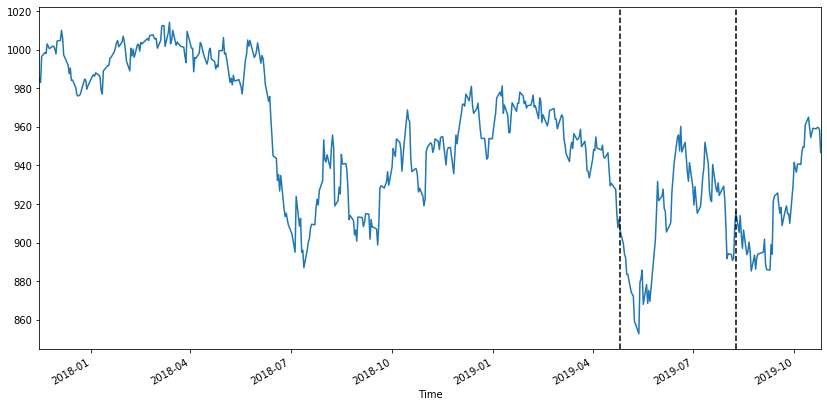

In [2]:
ax = dataset_train["Last"].plot(figsize=(14, 7))
ax.axvline("26-04-2019", linestyle="--", c="black")
ax.axvline("08-09-2019", linestyle="--", c="black")

In [3]:
df_train = dataset_train[dataset_train.index < "26-04-2019"]
df_train.shape

(362, 7)

In [4]:
df_val = dataset_train[(dataset_train.index >= "26-04-2019") & (dataset_train.index < "08-09-2019")]
df_val.shape

(73, 7)

In [5]:
dataset_train.head()

,Open,High,Low,Last,Change,Volume,Open Int
Time,,,,,,,
2017-11-15,985.0,985.0,985.0,985.0,6.5,0,0
2017-11-16,983.0,983.0,983.0,983.0,-2.0,0,0
2017-11-17,996.5,996.5,996.5,996.5,13.5,0,0
2017-11-20,998.5,998.5,998.5,998.5,2.0,0,0
2017-11-21,998.0,998.0,998.0,998.0,-0.5,0,0


In [6]:
training_set = dataset_train.iloc[:, 3:4].values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
# Creating a data structure with 15 timesteps and 1 output - we use last 15 prices to predict next. 
#This takes data from 15th row onwards
X_whole = []
y_whole = []
sequence_size = 6
for i in range(sequence_size, len(training_set_scaled)):
    X_whole = np.append(X_whole, training_set_scaled[i-sequence_size:i, 0])
    y_whole.append(training_set_scaled[i, 0])

sz = training_set_scaled.shape[0]-sequence_size
X_whole, y_whole = np.array(X_whole.reshape(sz,sequence_size)), np.array(y_whole)

In [8]:
#Train -valid and Test split in time order
X_train = X_whole[0:362,:].copy()
X_valid = X_whole[362:420,:].copy()
X_test = X_whole[420:,:].copy()

y_train = y_whole[0:362].copy()
y_valid = y_whole[362:420].copy()
y_test = y_whole[420:].copy()

In [13]:
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

 
# make a persistence forecast
def persistence(last_ob, n_seq):
	return [last_ob for i in range(n_seq)]
 
# evaluate the persistence model
def make_forecasts(train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = persistence(X[-1], n_seq)
		# store the forecast
		forecasts.append(forecast)
	return forecasts
 
# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = test[:,(n_lag+i)]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

#plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()

In [15]:
# configure
n_lag = 1
n_seq = 5
n_test = X_test.shape[0]

# make forecasts
forecasts = make_forecasts(X_train, X_test, n_lag, n_seq)

In [16]:
forecasts

[[0.5433436532507745,
  0.5433436532507745,
  0.5433436532507745,
  0.5433436532507745,
  0.5433436532507745],
 [0.4674922600619196,
  0.4674922600619196,
  0.4674922600619196,
  0.4674922600619196,
  0.4674922600619196],
 [0.45510835913312686,
  0.45510835913312686,
  0.45510835913312686,
  0.45510835913312686,
  0.45510835913312686],
 [0.4845201238390091,
  0.4845201238390091,
  0.4845201238390091,
  0.4845201238390091,
  0.4845201238390091],
 [0.4442724458204337,
  0.4442724458204337,
  0.4442724458204337,
  0.4442724458204337,
  0.4442724458204337],
 [0.4520123839009287,
  0.4520123839009287,
  0.4520123839009287,
  0.4520123839009287,
  0.4520123839009287],
 [0.47368421052631593,
  0.47368421052631593,
  0.47368421052631593,
  0.47368421052631593,
  0.47368421052631593],
 [0.4303405572755423,
  0.4303405572755423,
  0.4303405572755423,
  0.4303405572755423,
  0.4303405572755423],
 [0.34520123839009287,
  0.34520123839009287,
  0.34520123839009287,
  0.34520123839009287,
  0.345201

In [ ]:
# evaluate forecasts
evaluate_forecasts(X_test, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(X_whole, forecasts, n_test+2)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [ ]:
%%time
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 15, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adm = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# Compiling the RNN
regressor.compile(optimizer = adm, loss = 'mean_squared_error' , metrics=["mean_squared_error"])

# Fitting the RNN to the Training set
hist = regressor.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 100, batch_size = 8, verbose=0)

In [ ]:
plt.figure(figsize=(14,12))
plt.suptitle('Training Evaluation', fontsize=24)

plt.subplot(2,2,1)
#Plotting Training history
print(hist.history.keys())

# Visualising the results
plt.plot(hist.history['loss'], color = 'blue',  label = 'train_loss')
plt.plot(hist.history['val_loss'], color = 'red',  label = 'val_loss')
plt.title('Losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
#plt.show()
plt.subplot(2,2,2)
# Visualising the results
plt.plot(hist.history['mean_squared_error'], color = 'blue',  label = 'train_mean_squared_error')
plt.plot(hist.history['val_mean_squared_error'], color = 'red',  label = 'val_mean_squared_error')
plt.title('mean_squared_error')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

In [ ]:
#create empty table with 6 fields to inverse
real_stock_price = sc.inverse_transform(y_test.reshape(-1, 1))
real_stock_price.shape

In [ ]:
# Part 3 - Making the predictions and visualising the results
#real_stock_price = sc.inverse_transform(y_test.reshape(-1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
# create empty table with 6 fields to inverse
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

from sklearn.metrics import mean_absolute_error
from math import sqrt
# report performance
from sklearn.metrics import mean_squared_error
print("sqrt mean_squared_error: ", sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))
print("mean_squared_error: ", mean_squared_error(real_stock_price, predicted_stock_price))
mean_absolute_error = mean_absolute_error(real_stock_price, predicted_stock_price)
print("mean_absolute_error: ", mean_absolute_error)

fig = plt.figure(figsize=(12,8))
# Visualising the results
plt.plot(real_stock_price, color = 'red',  marker='o', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue',  marker='o', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#predicting on new data
xw=X_train[-1,:].copy()
xw=xw.reshape(1,-1)
xw=np.reshape(xw,(xw.shape[0], xw.shape[1], 1))

y_pred_w = []

num_of_pred = real_stock_price.shape[0]

for i in range(0,num_of_pred):
    
    y_pred1=regressor.predict(xw)
    y_transformed  = sc.inverse_transform(y_pred1)
    y_pred_w = np.append(y_pred_w,y_transformed)
    
    #print("Before", xw)
#    print(xwvap)
#    print(xvchange)
    #print(y_pred1)
    
    if sequence_size>1:
        for j in range(sequence_size-1):
            xw[:,j]=xw[:,j+1]
        
    xw[:,sequence_size-1]=y_pred1

    #print("After",xw)
#    print(xwvap)
#    print(xvchange)
    
print(y_pred_w)
predicted_stock_price = y_pred_w
predicted_stock_price.shape[0]


from sklearn.metrics import mean_absolute_error
from math import sqrt
# report performance
from sklearn.metrics import mean_squared_error
print("sqrt mean_squared_error: ", sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))
print("mean_squared_error: ", mean_squared_error(real_stock_price, predicted_stock_price))
mean_absolute_error = mean_absolute_error(real_stock_price, predicted_stock_price)
print("mean_absolute_error: ", mean_absolute_error)

fig = plt.figure(figsize=(12,8))
# Visualising the results
plt.plot(real_stock_price, color = 'red',  marker='o', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue',  marker='o', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
import plotly.express as px

# Getting the real stock price 
# Importing the training set
dataset_train = pd.read_csv('./marketdata/zsh20.csv')
#dataset_train = dataset_train[dataset_train["Volume"] != 0]
training_set = dataset_train.iloc[:, 4:5].values
real_stock_price = dataset_train.iloc[422:, 4:5].values

prices = pd.DataFrame(real_stock_price, columns=["prices"])
prices["Time"] = dataset_train["Time"].iloc[422:].values
prices['data'] = 'real_stock_price'

prices1 = pd.DataFrame(predicted_stock_price, columns=["prices"])
prices1["Time"] = dataset_train["Time"].iloc[422:].values
prices1['data'] = 'predicted_stock_price'
prices1.fillna("10/26/2019", inplace=True)

prices = prices.append(prices1, ignore_index=True)

fig = px.line(prices, x="Time", y="prices", line_dash="data")
fig.show()

## lightgbm

In [ ]:
import lightgbm as lgb
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2)))


print('Training and making predictions')
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0, 
    'metric': 'rmsle'}

n_estimators = 60

n_iters = 5
preds_buf = []
err_buf = []

#Train -valid and Test split in time order
X_train = X_whole[0:362,:].copy()
X_valid = X_whole[362:420,:].copy()
X_test = X_whole[420:,:].copy()

y_train = y_whole[0:362].copy()
y_valid = y_whole[362:420].copy()
y_test = y_whole[420:].copy()

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid)
watchlist = [d_valid]

model = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)
predicted_stock_price = model.predict(X_test)

#create empty table with 6 fields to inverse
test_data = np.zeros(shape=(len(y_test), 6) )
test_data[:,2] = y_test
real_stock_price = sc.inverse_transform(test_data)[:,2]

# Part 3 - Making the predictions and visualising the results
#real_stock_price = sc.inverse_transform(y_test.reshape(-1, 1))
# create empty table with 6 fields to inverse
test_data = np.zeros(shape=(len(predicted_stock_price), 6) )
test_data[:,2] = predicted_stock_price.reshape(1,-1)
predicted_stock_price = sc.inverse_transform(test_data)[:,2]

#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

from sklearn.metrics import mean_absolute_error
from math import sqrt
# report performance
from sklearn.metrics import mean_squared_error
print("sqrt mean_squared_error: ", sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))
print("mean_squared_error: ", mean_squared_error(real_stock_price, predicted_stock_price))
mean_absolute_error = mean_absolute_error(real_stock_price, predicted_stock_price)
print("mean_absolute_error: ", mean_absolute_error)
fig = plt.figure(figsize=(12,8))
# Visualising the results
plt.plot(real_stock_price, color = 'red',  marker='o', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue',  marker='o', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## RandomForest

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=60)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train), rf.score(X_test, y_test))
print(np.sqrt(MSE(y_test, rf.predict(X_test))))
predicted_stock_price = rf.predict(X_test)
#create empty table with 6 fields to inverse
test_data = np.zeros(shape=(len(y_test), 6) )
test_data[:,2] = y_test
real_stock_price = sc.inverse_transform(test_data)[:,2]

# Part 3 - Making the predictions and visualising the results
#real_stock_price = sc.inverse_transform(y_test.reshape(-1, 1))
# create empty table with 6 fields to inverse
test_data = np.zeros(shape=(len(predicted_stock_price), 6) )
test_data[:,2] = predicted_stock_price.reshape(1,-1)
predicted_stock_price = sc.inverse_transform(test_data)[:,2]

#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

from sklearn.metrics import mean_absolute_error
from math import sqrt
# report performance
from sklearn.metrics import mean_squared_error
print("sqrt mean_squared_error: ", sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))
print("mean_squared_error: ", mean_squared_error(real_stock_price, predicted_stock_price))
mean_absolute_error = mean_absolute_error(real_stock_price, predicted_stock_price)
print("mean_absolute_error: ", mean_absolute_error)

fig = plt.figure(figsize=(12,8))
# Visualising the results
plt.plot(real_stock_price, color = 'red',  marker='o', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue',  marker='o', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train), gb.score(X_test, y_test))
print(np.sqrt(MSE(y_test, gb.predict(X_test))))

preds = gb.predict(X_test)
# Part 3 - Making the predictions and visualising the results
predicted_stock_price = sc.inverse_transform(preds.reshape(-1, 1))

from sklearn.metrics import mean_absolute_error
from math import sqrt
# report performance
mean_absolute_error = mean_absolute_error(real_stock_price, predicted_stock_price)
print("mean_absolute_error: ", mean_absolute_error)

fig = plt.figure(figsize=(12,8))
# Visualising the results
plt.plot(real_stock_price, color = 'red',  marker='o', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue',  marker='o', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## XGBoost

In [ ]:
from xgboost.sklearn import XGBRegressor
reg=XGBRegressor(learning_rate=0.1, n_estimators=60, n_jobs=1)
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train), reg.score(X_test, y_test))
print(np.sqrt(MSE(y_test, reg.predict(X_test))))
preds = reg.predict(X_test)

# Part 3 - Making the predictions and visualising the results
predicted_stock_price = sc.inverse_transform(preds.reshape(-1, 1))

from sklearn.metrics import mean_absolute_error
from math import sqrt
# report performance
mean_absolute_error = mean_absolute_error(real_stock_price, predicted_stock_price)
print("mean_absolute_error: ", mean_absolute_error)

fig = plt.figure(figsize=(12,8))
# Visualising the results
plt.plot(real_stock_price, color = 'red',  marker='o', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue',  marker='o', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#Train -valid and Test split in time order
X_train = X_whole[0:362,:].copy()
X_valid = X_whole[362:420,:].copy()
X_test = X_whole[420:,:].copy()

y_train = y_whole[0:362].copy()
y_valid = y_whole[362:420].copy()
y_test = y_whole[420:].copy()

#predicting on new data
xw=X_valid[-1,:].copy()
xw=xw.reshape(1,-1)
#xw=np.reshape(xw,(xw.shape[0], xw.shape[1], 1))

y_pred_w = []

num_of_pred = X_test.shape[0]

for i in range(0,num_of_pred):
    
    preds = reg.predict(xw)

    # Part 3 - Making the predictions and visualising the results
    predicted_stock_price = sc.inverse_transform(preds.reshape(-1, 1))
    y_pred_w = np.append(y_pred_w,y_transformed)
    
    #print("Before", xw)
#    print(xwvap)
#    print(xvchange)
    #print(y_pred1)
    
    if sequence_size>1:
        for j in range(sequence_size-1):
            xw[:,j]=xw[:,j+1]
        
    xw[:,sequence_size-1]=y_pred1

    #print("After",xw)
#    print(xwvap)
#    print(xvchange)
    
print(y_pred_w)
predicted_stock_price = y_pred_w
predicted_stock_price.shape[0]


from sklearn.metrics import mean_absolute_error
from math import sqrt
# report performance
from sklearn.metrics import mean_squared_error
print("sqrt mean_squared_error: ", sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))
print("mean_squared_error: ", mean_squared_error(real_stock_price, predicted_stock_price))
mean_absolute_error = mean_absolute_error(real_stock_price, predicted_stock_price)
print("mean_absolute_error: ", mean_absolute_error)

fig = plt.figure(figsize=(12,8))
# Visualising the results
plt.plot(real_stock_price, color = 'red',  marker='o', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue',  marker='o', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
